<a href="https://colab.research.google.com/github/saahil-jain/Covid_19_predictor/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.callbacks import ModelCheckpoint

import re
import os
import numpy
import pandas as pd
from matplotlib import pyplot as plt

print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/content/Covid_19_predictor
Current working directory is already Covid_19_predictor


In [21]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

Already up to date.


In [0]:
df=pd.read_csv("data.csv")
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
country_wise_cases=dict()
country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]

In [0]:
cumulative_country_wise_cases=dict()
cumulative_country_wise_deaths=dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  total_days = len(country_wise_deaths[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)

In [24]:
print("Enter the country\n")
cont = input()

Enter the country

United_States_of_America


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 5, 5, 5, 5, 6, 7, 8, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 16, 35, 35, 35, 53, 53, 59, 60, 66, 69, 89, 103, 125, 159, 233, 338, 433, 554, 754, 1025, 1312, 1663, 2174, 2951, 3774, 4661, 6427, 9415, 14250, 19624, 26747, 35206, 46442, 55231, 69194, 85991, 104686, 124665, 143025, 164620, 189618, 216721, 245540, 277965, 312237, 337635, 368196, 398809, 432132, 466033, 501560, 529951, 557571, 582594, 609516, 639664, 671331, 702164, 735086, 759687, 787752, 825041, 842629, 869172, 890524, 939053, 965910, 988451, 1012583, 1039909, 1069826, 1103781, 1133069, 1158041, 1180634, 1204475, 1228603, 1256972, 1283929, 1309541, 1329799, 1347916, 1369964, 1390746, 1417889, 1443397, 1467884, 1486757, 1508598, 1528568, 1551853, 1577287]


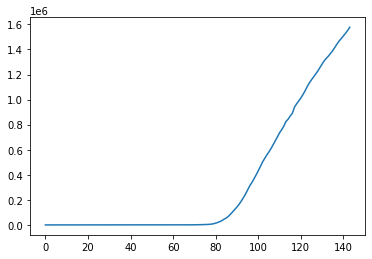

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 9, 11, 12, 14, 17, 21, 26, 28, 30, 40, 47, 57, 69, 85, 108, 150, 150, 260, 340, 471, 590, 801, 1050, 1296, 1707, 2191, 2509, 3170, 4079, 5138, 6053, 7157, 8501, 9647, 10989, 12895, 14817, 16690, 18777, 20608, 22108, 23649, 26057, 30985, 33284, 37054, 38910, 40682, 42539, 45063, 46784, 49963, 51017, 53189, 54876, 56245, 58355, 60966, 63006, 65068, 66385, 67682, 68934, 71078, 73431, 75670, 77180, 78794, 79528, 80684, 82387, 84133, 85906, 87568, 88754, 89562, 90353, 91921, 93439, 94702]


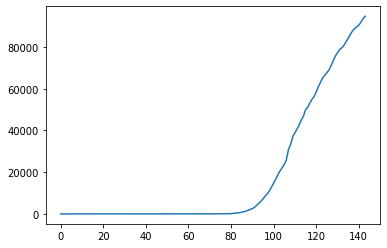

In [25]:
for country in countries:
  if country == cont:
    print(cumulative_country_wise_cases[country])
    graph=plt.plot(cumulative_country_wise_cases[country])
plt.show()

for country in countries:
  if country == cont:
    print(cumulative_country_wise_deaths[country])
    graph=plt.plot(cumulative_country_wise_deaths[country])
plt.show()

In [26]:
for country in countries:
  if country == cont:
    cont_cases = []
    cont_death = []
    total_days = len(country_wise_deaths[country])
    for index in range(total_days):
      cont_cases.append(country_wise_cases[country][index])
      cont_death.append(country_wise_deaths[country][index])

print(cont_cases)
print(cont_death)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 19, 0, 0, 18, 0, 6, 1, 6, 3, 20, 14, 22, 34, 74, 105, 95, 121, 200, 271, 287, 351, 511, 777, 823, 887, 1766, 2988, 4835, 5374, 7123, 8459, 11236, 8789, 13963, 16797, 18695, 19979, 18360, 21595, 24998, 27103, 28819, 32425, 34272, 25398, 30561, 30613, 33323, 33901, 35527, 28391, 27620, 25023, 26922, 30148, 31667, 30833, 32922, 24601, 28065, 37289, 17588, 26543, 21352, 48529, 26857, 22541, 24132, 27326, 29917, 33955, 29288, 24972, 22593, 23841, 24128, 28369, 26957, 25612, 20258, 18117, 22048, 20782, 27143, 25508, 24487, 18873, 21841, 19970, 23285, 25434]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 3, 2, 1, 2, 3, 4, 5, 2, 2, 10, 7, 10, 12, 16, 23, 42, 0, 110, 80, 131, 119, 211, 249, 246

In [0]:
X = [x for x in range(len(cont_cases))]
X = array(X).reshape(len(cont_cases), 1, 1)

In [28]:
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(256, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 256)            264192    
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.fit(X, cont_cases, epochs=4096, validation_split=0.1, verbose=1, batch_size = 8)

Streaming output truncated to the last 5000 lines.
129/129 [==============================] - 0s 2ms/step - loss: 20889645.3333 - mse: 20889646.0000 - val_loss: 131272983.4667 - val_mse: 131272984.0000
Epoch 1598/4096
129/129 [==============================] - 0s 2ms/step - loss: 17941283.9457 - mse: 17941284.0000 - val_loss: 153315611.7333 - val_mse: 153315600.0000
Epoch 1599/4096
129/129 [==============================] - 0s 2ms/step - loss: 18105222.2868 - mse: 18105222.0000 - val_loss: 153042264.5333 - val_mse: 153042256.0000
Epoch 1600/4096
129/129 [==============================] - 0s 2ms/step - loss: 20167511.2026 - mse: 20167512.0000 - val_loss: 162993267.2000 - val_mse: 162993264.0000
Epoch 1601/4096
129/129 [==============================] - 0s 2ms/step - loss: 17061174.2949 - mse: 17061176.0000 - val_loss: 156609512.5333 - val_mse: 156609504.0000
Epoch 1602/4096
129/129 [==============================] - 0s 2ms/step - loss: 17296901.9769 - mse: 17296904.0000 - val_loss: 1615

In [34]:
test_values = []
for i in range(len(cont_cases)):
  test_input = array([i])
  test_input = test_input.reshape((1, 1, 1))
  test_output = model.predict(test_input, verbose=0)
  test_values.append(test_output[0][0])
  print(f"train: {cont_cases[i]}      test: {test_output[0][0]}    off by: {abs(cont_cases[i]-test_output[0][0])*100/cont_cases[i]}")

train: 0      test: 0.19920063018798828    off by: inf
train: 0      test: 1.20672607421875    off by: inf
train: 0      test: 0.7373825311660767    off by: inf
train: 0      test: -0.19082260131835938    off by: inf
train: 0      test: -1.1052577495574951    off by: inf
train: 0      test: -1.6305947303771973    off by: inf
train: 0      test: -1.7880332469940186    off by: inf
train: 0      test: -1.4796974658966064    off by: inf
train: 0      test: -0.6033730506896973    off by: inf
train: 0      test: 0.7533718347549438    off by: inf
train: 0      test: 2.1352055072784424    off by: inf
train: 0      test: 2.6489152908325195    off by: inf
train: 0      test: 1.7734735012054443    off by: inf
train: 0      test: 1.5501830577850342    off by: inf
train: 0      test: 1.6750750541687012    off by: inf
train: 0      test: 2.512319326400757    off by: inf
train: 0      test: 3.7234067916870117    off by: inf
train: 0      test: 4.550790786743164    off by: inf
train: 0      test: 4.40

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


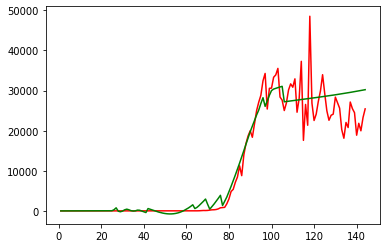

In [35]:
x = [i+1 for i in range(len(cont_cases))]
plt.plot(x, cont_cases , color = 'R')
x = [i+1 for i in range(len(test_values))]
plt.plot(x, test_values , color = 'G')
plt.show()